In [1]:
import pandas as pd
import numpy as np

import functions

import warnings
warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv('data/Invistico_Airline.csv')
pd.set_option('display.max_columns', None)
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [3]:
# data.info()

In [4]:
data['satisfaction'].value_counts()

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

In [5]:
satisfied = data['satisfaction'].value_counts()['satisfied']
print('Amount of SATISFIED CUSTOMER IS:', satisfied)

no_satisfied = data['satisfaction'].value_counts()['satisfied']
print('Amount of NO SATISFIED CUSTOMER IS:', no_satisfied)

satisfaction_percentage = round(satisfied/(no_satisfied + satisfied)*100,2)
print('Satisfaction percentage is:', satisfaction_percentage)

Amount of SATISFIED CUSTOMER IS: 71087
Amount of NO SATISFIED CUSTOMER IS: 71087
Satisfaction percentage is: 50.0


<AxesSubplot:xlabel='satisfaction', ylabel='count'>

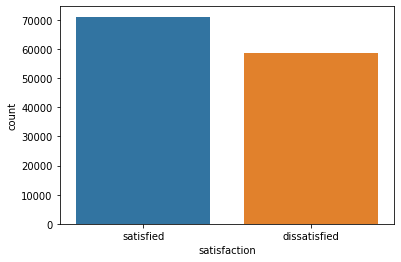

In [6]:
import seaborn as sns
display(sns.countplot(x=data['satisfaction']))

In [7]:
data['satisfaction'] = data.satisfaction.replace(to_replace=['dissatisfied', 'satisfied'], value=[0, 1])
data['satisfaction'].unique()

array([1, 0])

In [8]:
# Numerical columns
print('Numerical features:')
numerical = data.select_dtypes(['number'])
display(numerical.head())

print('Categorical features:')
# Categorical columns
categorical = data.select_dtypes(['object'])
display(categorical.head())

Numerical features:


,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,1,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,1,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,1,60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,1,70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


Categorical features:


,Gender,Customer Type,Type of Travel,Class
0,Female,Loyal Customer,Personal Travel,Eco
1,Male,Loyal Customer,Personal Travel,Business
2,Female,Loyal Customer,Personal Travel,Eco
3,Female,Loyal Customer,Personal Travel,Eco
4,Female,Loyal Customer,Personal Travel,Eco


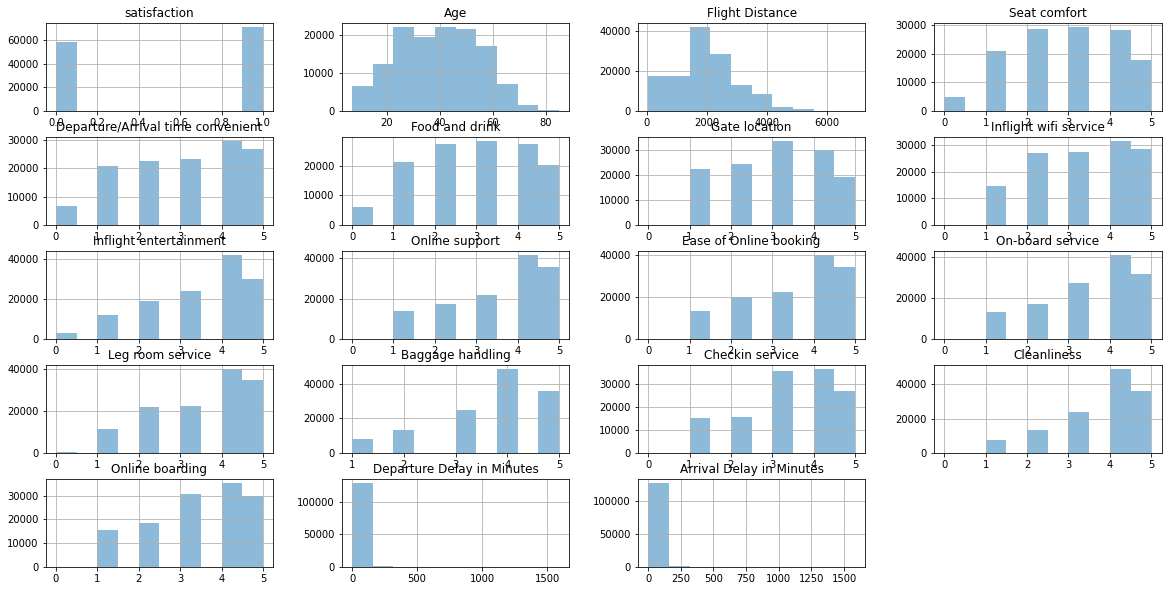

In [9]:
from matplotlib import pyplot
numerical.hist(alpha=0.5, figsize=(20, 10))
pyplot.show()

In [10]:

numerical = numerical.dropna()
functions.nulls_percent(numerical)

,column_name,nulls_percentage
0,satisfaction,0.0
1,Age,0.0
2,Flight Distance,0.0
3,Seat comfort,0.0
4,Departure/Arrival time convenient,0.0
5,Food and drink,0.0
6,Gate location,0.0
7,Inflight wifi service,0.0
8,Inflight entertainment,0.0
9,Online support,0.0


In [11]:
# Need to change SATISFACTION col. Make it 0 and 1. 0 nosatisfacted 1 satisfacted
# So I can treat as a numerical and do X y Split with numericals
# Then try to run the Pipeline

In [12]:
y = numerical['satisfaction']
X = numerical.drop('satisfaction', axis=1)

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

standardize_var = ['Age']
standardize_transformer = Pipeline(steps=[('standard', StandardScaler())])
normalize_var = ['Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
normalize_transformer = Pipeline(steps=[('norm', MinMaxScaler())])

In [14]:
X.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [15]:
from sklearn.model_selection import train_test_split

x2_train, x2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2)

preprocessor = ColumnTransformer(transformers=
    [('standard', standardize_transformer, standardize_var),
    ('norm', normalize_transformer, normalize_var)], remainder='passthrough')

clf = Pipeline(steps=[('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='lbfgs'))])
clf.fit(x2_train, y2_train)
print('Accuracy after standardizing Gaussian distributed features and normalizing Non-Gaussian features: {:.2f}'.format(clf.score(x2_test, y2_test)))

Accuracy after standardizing Gaussian distributed features and normalizing Non-Gaussian features: 0.81
